In [43]:
import sys
import warnings
#warnings.filterwarnings('ignore')
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from scipy.signal import hilbert, chirp
from statsmodels.tsa.arima_model import ARMA
from tqdm import tqdm
pi=3.14
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.iolib.table import SimpleTable
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
from matplotlib import pyplot
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
from math import sin
from math import radians
from numpy import pi
from numpy import sin,cos
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import integrate
import scipy.fftpack as fourier

import threading,time
import multiprocessing

#from rtlsdr import RtlSdr
from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
#import bitarray
from  scipy.io.wavfile import read as wavread


%matplotlib inline

In [61]:
"""
Простое экспоненциальное сглаживание
"""
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [65]:
"""
Авторегрессия
"""
def func_AR(data):
    model = AutoReg(data, lags=24)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(data), end=len(data)+len(data)-1, dynamic=False)
    #plt.plot(predictions, label="SinAR")
    return predictions

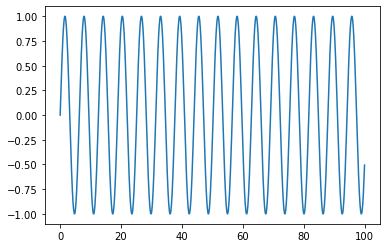

In [63]:
nsample = 1024
## simulate a simple sinusoidal function
x1 = np.linspace(0, 100, nsample)
ysin=np.sin(x1) 
fig, ax = plt.subplots()
ax.plot(x1, ysin, label="Data")

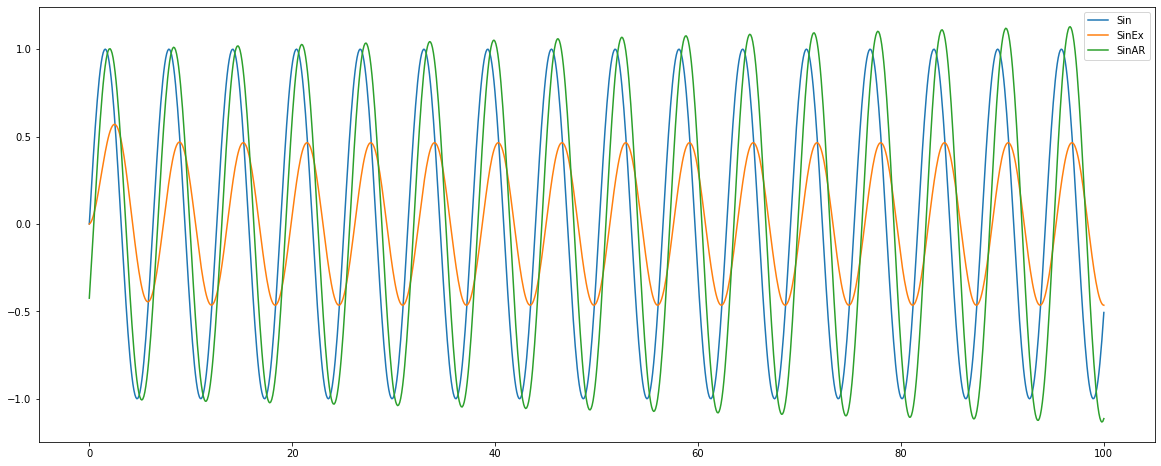

In [67]:
plt.figure(figsize=(20, 8))
plt.plot(x1, ysin, label="Sin")
plt.plot(x1, exponential_smoothing(ysin, 0.05), label="SinEx")

plt.plot(x1, func_AR(ysin), label="SinAR")
#plt.plot(x1, y, label="SinARMA")
#model = AutoReg(ysin, lags=24)
#model_fit = model.fit()
#predictions = model_fit.predict(start=len(ysin), end=len(ysin)+len(ysin)-1, dynamic=False)
plt.legend()

In [2]:
sin_data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]

In [3]:
sin_data

[0.0,
 0.01745240643728351,
 0.03489949670250097,
 0.052335956242943835,
 0.0697564737441253,
 0.08715574274765817,
 0.10452846326765347,
 0.12186934340514748,
 0.13917310096006544,
 0.15643446504023087,
 0.17364817766693033,
 0.1908089953765448,
 0.20791169081775934,
 0.224951054343865,
 0.24192189559966773,
 0.25881904510252074,
 0.27563735581699916,
 0.29237170472273677,
 0.3090169943749474,
 0.3255681544571567,
 0.3420201433256687,
 0.35836794954530027,
 0.374606593415912,
 0.39073112848927377,
 0.4067366430758002,
 0.42261826174069944,
 0.4383711467890774,
 0.45399049973954675,
 0.4694715627858908,
 0.48480962024633706,
 0.49999999999999994,
 0.5150380749100542,
 0.5299192642332049,
 0.5446390350150271,
 0.5591929034707469,
 0.573576436351046,
 0.5877852522924731,
 0.6018150231520483,
 0.6156614753256583,
 0.6293203910498374,
 0.6427876096865393,
 0.6560590289905073,
 0.6691306063588582,
 0.6819983600624985,
 0.6946583704589973,
 0.7071067811865476,
 0.7193398003386512,
 0.7313537

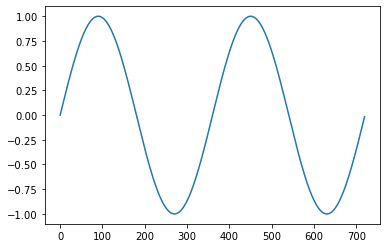

In [4]:
pyplot.plot(sin_data)

In [25]:
len(sin_data)

720

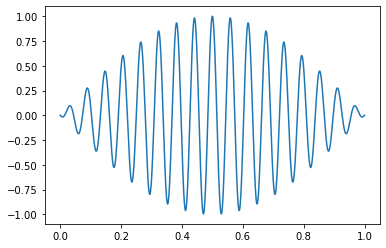

In [5]:
def sleep_spindle_match(sampling_freq):
    freq = 17 #Hz

    x = np.arange(0,1,1.0/sampling_freq)
    y = np.sin(2 * np.pi * freq * x + (np.pi/2)) * np.cos(np.pi * x + (np.pi/2))

    spindle = {'x':x, 'y':y}

    return spindle



x = sleep_spindle_match(44100)
plt.plot(x['x'], x['y'])
#plt.show()

(0.0, 120.0)

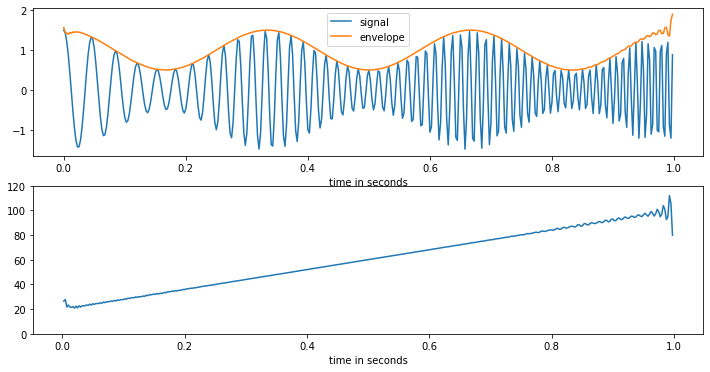

In [75]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.cos(2.0*np.pi*3.0*t) )
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)
fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

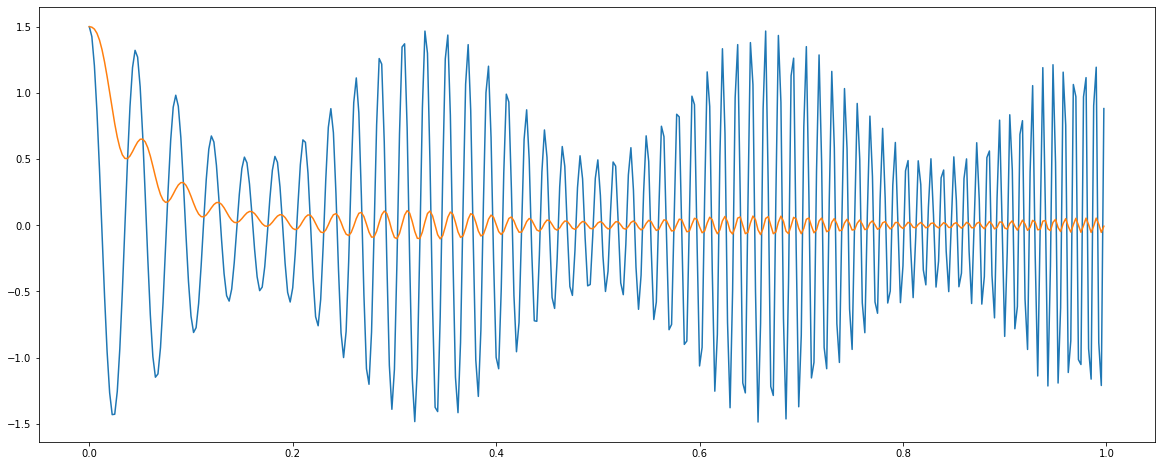

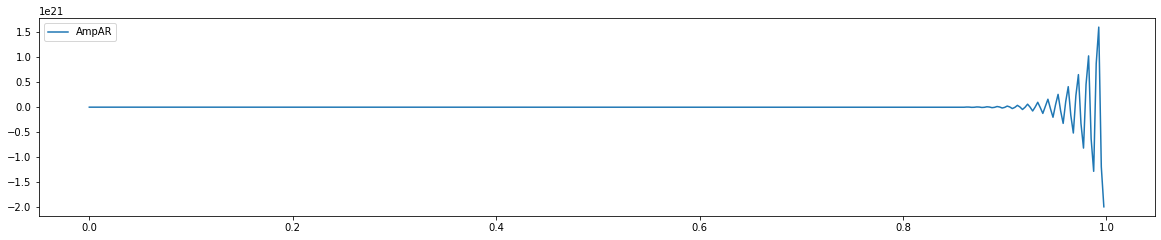

In [114]:
plt.figure(figsize=(20, 8))
plt.plot(t, signal, label="Amp")
plt.plot(t, exponential_smoothing(signal, 0.05), label="AmpEx")
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
ax1.plot(t, func_AR(signal), label="AmpAR")
plt.legend()

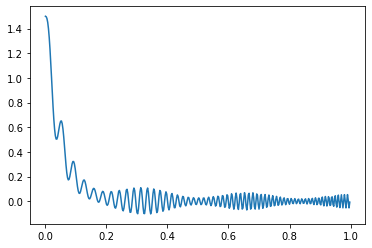

In [113]:
plt.plot(t, exponential_smoothing(signal, 0.05), label="AmpEx")

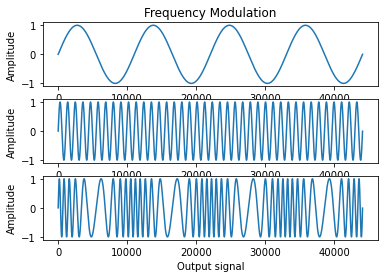

In [7]:
modulator_frequency = 4.0
carrier_frequency = 40.0
modulation_index = 1.0

time = np.arange(44100.0) / 44100.0
modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
product = np.zeros_like(modulator)

for i, t in enumerate(time):
    product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))

plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()

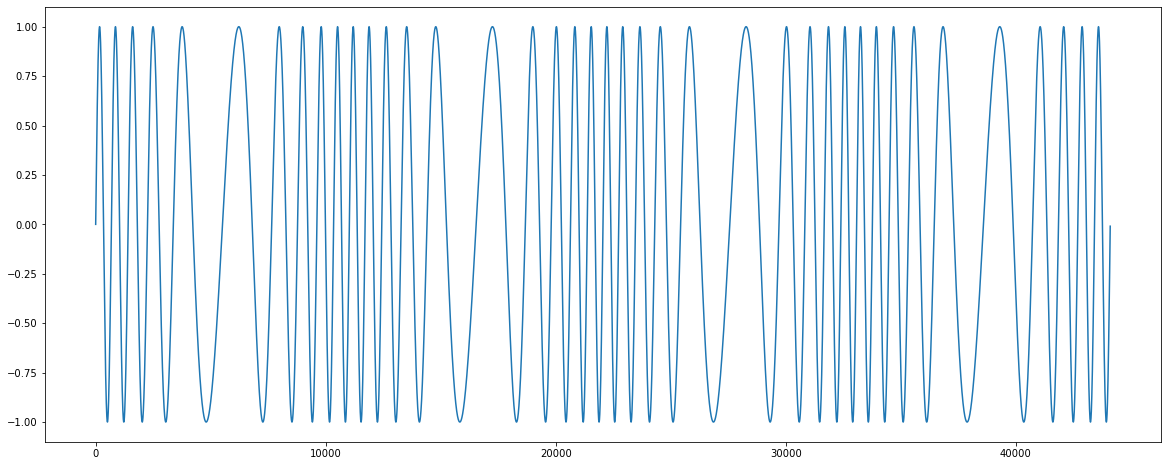

In [102]:
plt.figure(figsize=(20, 8))
plt.plot(product, label="Freq")

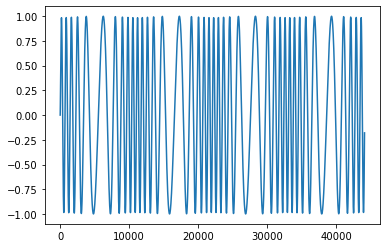

In [103]:
plt.plot(exponential_smoothing(product, 0.05), label="FreqEx")


c:\users\max\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:540: RuntimeWarning:

overflow encountered in matmul

c:\users\max\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:540: RuntimeWarning:

invalid value encountered in matmul



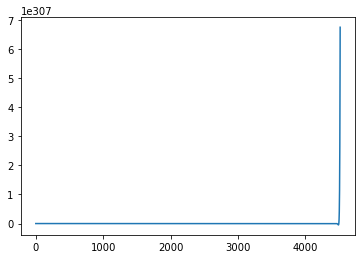

In [105]:
plt.plot(func_AR(product), label="FreqAR")

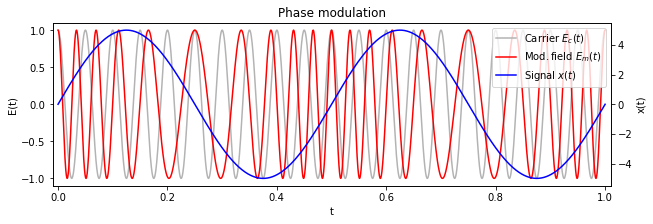

In [8]:
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 2                      # Phase modulation freq
m = 5                       # Modulation index
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c + m*np.sin(fm*2*np.pi*t+phi_m))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Phase modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

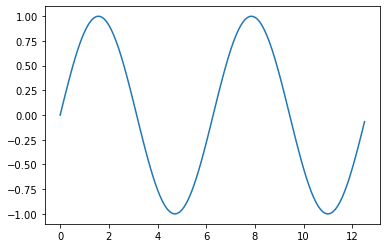

In [9]:
xSin = np.arange(0,4*np.pi,0.1)   # start,stop,step
ySin = np.sin(xSin)
plt.plot(xSin,ySin)

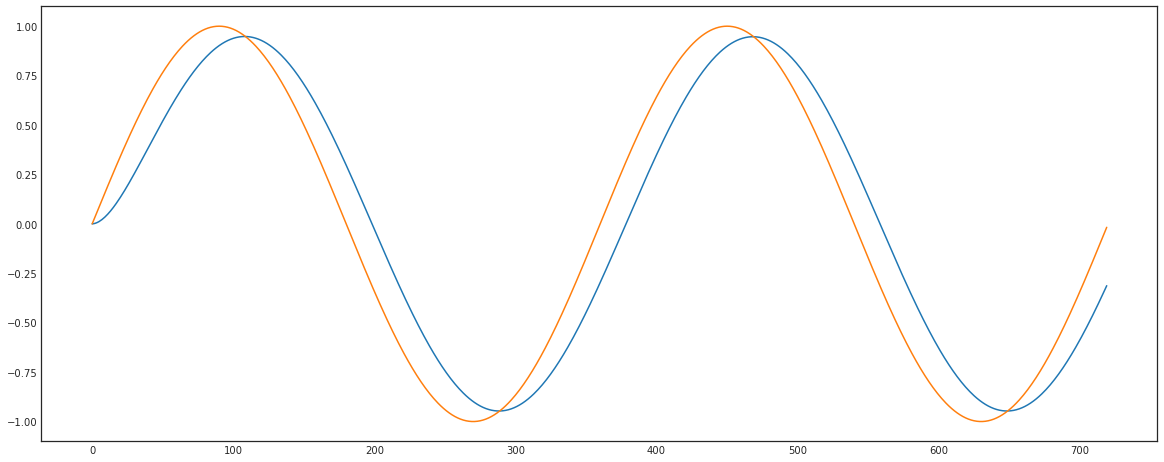

In [30]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    plt.plot(exponential_smoothing(sin_data, 0.05), label="SinEx")
    plt.plot(sin_data,label="Sin")

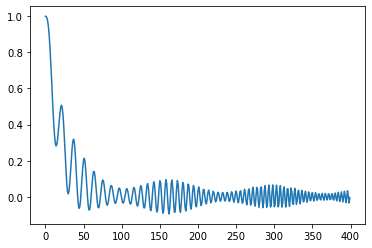

In [12]:
  plt.plot(exponential_smoothing(signal, 0.05), label="Amp")

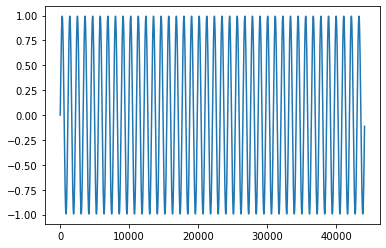

In [13]:
plt.plot(exponential_smoothing(carrier, 0.05), label="Freq")

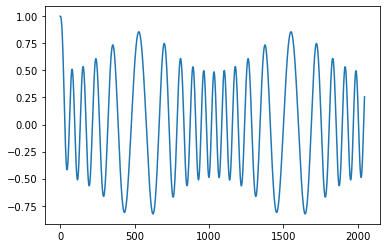

In [14]:
plt.plot(exponential_smoothing(E_m, 0.05), label="Phase")

In [15]:
"""
ARMA
"""
def ARMA1(data):
    for n in range(1, len(data)):
        model = ARMA(n, order=(2, 1))
        model_fit = model.fit()

In [ ]:
import statsmodels.tsa.api as smt
#arma_model = ARMA(sin_data, freq='D', order=(P, Q))
#arma_res = model.fit(method="css-mle", trend='c', transparams=True)
sinARMA=smt.arma_generate_sample(sin_data=sin_data, ma=ma, nsample=n) 
mdl = sin_data.ARMA(ma1, order=(0, 1)).fit(maxlag=len(sin_data), method='mle', trend='nc')
pred = mdl.predict()

In [ ]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0)
model.params

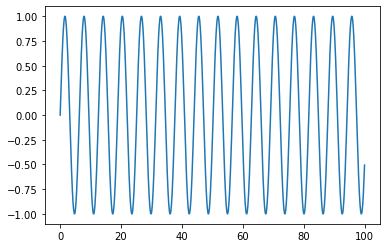

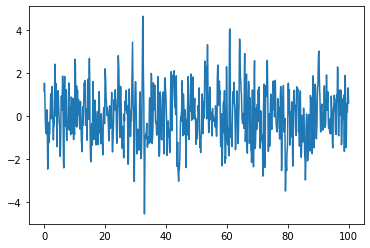

In [35]:

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]

y = arma_generate_sample(arparams, maparams, nsample)
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data") 

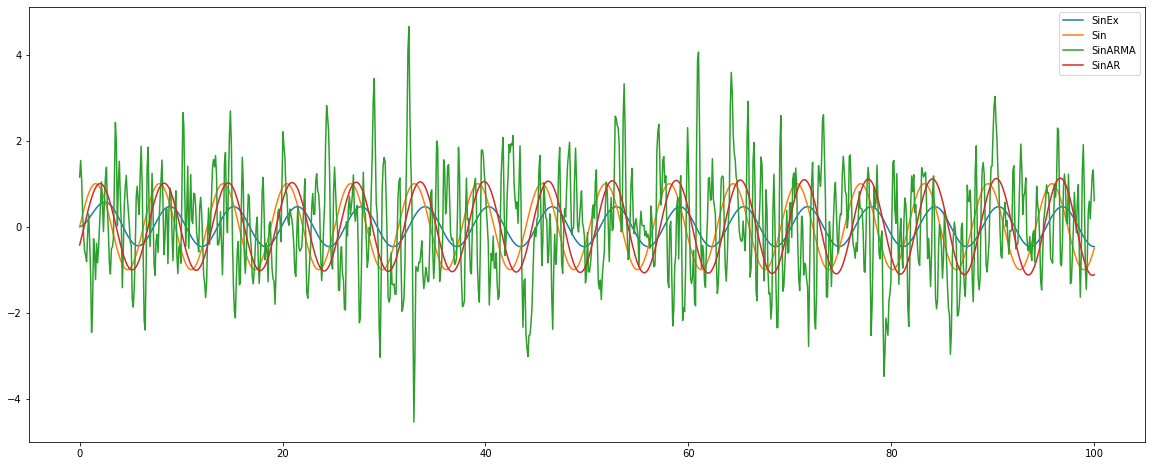